In [54]:
import obspy
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm,trange

from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

from libcomcat.dataframes import get_phase_dataframe
from libcomcat.search import get_event_by_id


In [55]:
from obspy.clients.fdsn import RoutingClient
client = Client("IRIS")
#client = RoutingClient("iris-federator")

In [116]:
#50.45, 30.523333

lat=50.45
lon=30.523333
minr=0.0
maxr=7.0
level='channel'
start='2022-02-23T00:00:00'
end='2022-02-28T00:00:00'

fmat = 'xml'

In [117]:
channel = 'B?Z'

In [118]:
sta_inventory = client.get_stations(starttime=start,
                                    endtime=end,
                                    latitude=lat,
                                    longitude=lon,
                                    minradius=minr,
                                    maxradius=maxr,
                                    level=level,
                                    channel = channel,
                                    format=fmat)

In [119]:
channel = sta_inventory.get_contents()['channels']

In [120]:
len(channel)

19

In [121]:
channel_reorder = ['.'.join( [ch.split('.')[0],ch.split('.')[1],ch.split('.')[3],ch.split('.')[2]] ) for ch in channel]

In [122]:
channel_reorder

['GE.KWP.BHZ.',
 'GE.SUW.BHZ.',
 'GE.TIRR.BHZ.',
 'GE.TIRR.BNZ.',
 'GE.TIRR.BHZ.00',
 'II.OBN.BHZ.00',
 'II.OBN.BHZ.10',
 'IM.AKASG.BHZ.FB',
 'IU.KIEV.BHZ.00',
 'IU.KIEV.BHZ.10',
 'PL.BEL.BHZ.',
 'PL.KWP.BHZ.',
 'PL.NIE.BHZ.',
 'PL.OJC.BHZ.',
 'PL.SUW.BHZ.',
 'RO.BUR31.BHZ.',
 'RO.BUR32.BHZ.',
 'RO.BUR33.BHZ.',
 'RO.BURAR.BHZ.']

In [123]:
for i,ch in enumerate(channel):
    
    sta_coordinates = sta_inventory.get_channel_metadata(ch)
    sta_temp_df = pd.DataFrame(sta_coordinates,index=[i])
    
    if i==0:
        sta_df = sta_temp_df
    else:
        sta_df = pd.concat([sta_df,sta_temp_df])

In [124]:
sta_df['station'] = channel

In [125]:
sta_df

,latitude,longitude,elevation,local_depth,azimuth,dip,station
0,49.630501,22.707800,463.0,0.0,0.0,-90.0,GE.KWP..BHZ
1,54.012501,23.180799,152.0,0.0,0.0,-90.0,GE.SUW..BHZ
2,44.458099,28.412800,77.0,0.0,0.0,-90.0,GE.TIRR..BHZ
3,44.458099,28.412800,77.0,3.0,0.0,-90.0,GE.TIRR..BNZ
4,44.458099,28.412800,77.0,0.0,0.0,-90.0,GE.TIRR.00.BHZ
5,55.114600,36.567400,160.0,30.0,0.0,-90.0,II.OBN.00.BHZ
6,55.114600,36.567400,160.0,30.0,0.0,-90.0,II.OBN.10.BHZ
7,50.701199,29.224199,160.0,0.0,0.0,-90.0,IM.AKASG.FB.BHZ
8,50.701200,29.224200,180.0,0.0,0.0,-90.0,IU.KIEV.00.BHZ
9,50.701200,29.224200,180.0,0.0,0.0,-90.0,IU.KIEV.10.BHZ


In [126]:
#sta_df.to_csv('./station_Kyiv.csv',index=False)

In [127]:
print(type(client))  

<class 'obspy.clients.fdsn.client.Client'>


In [128]:
otime = UTCDateTime('2022-02-24 02:00:00')
endtime = UTCDateTime('2022-02-24 12:00:00')

In [129]:
bulk = []
for i in range(len(sta_df)):
    
    net = sta_df.station[i].split('.')[0]
    sta = sta_df.station[i].split('.')[1]
    loc = sta_df.station[i].split('.')[2]
    cha = sta_df.station[i].split('.')[3]
    
    query_tuple = (net,sta,loc,cha,otime,endtime)
    bulk.append(query_tuple)

In [130]:
st = client.get_waveforms_bulk(bulk,attach_response=True)

In [131]:
print(st.__str__(extended=True))

11 Trace(s) in Stream:
GE.TIRR..BHZ   | 2022-02-24T02:00:00.005000Z - 2022-02-24T11:59:59.955000Z | 20.0 Hz, 720000 samples
II.OBN.00.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.969538Z | 20.0 Hz, 720000 samples
II.OBN.10.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.994538Z | 40.0 Hz, 1440000 samples
IU.KIEV.00.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:06.569538Z | 20.0 Hz, 223332 samples
IU.KIEV.10.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:12.819538Z | 40.0 Hz, 446913 samples
PL.BEL..BHZ    | 2022-02-24T02:00:00.002600Z - 2022-02-24T11:59:59.952600Z | 20.0 Hz, 720000 samples
PL.KWP..BHZ    | 2022-02-24T02:00:00.037000Z - 2022-02-24T11:59:58.137000Z | 20.0 Hz, 719963 samples
PL.NIE..BHZ    | 2022-02-24T02:00:00.009000Z - 2022-02-24T12:00:03.509000Z | 20.0 Hz, 720071 samples
PL.OJC..BHZ    | 2022-02-24T02:00:00.028000Z - 2022-02-24T12:00:01.778000Z | 20.0 Hz, 720036 samples
PL.SUW..BHZ    | 2022-02-24T02:00:00.012000Z - 2022-02-24T12:00:03.

In [132]:
#st.write('kyiv.mseed',format="MSEED")

In [133]:
st

11 Trace(s) in Stream:
GE.TIRR..BHZ   | 2022-02-24T02:00:00.005000Z - 2022-02-24T11:59:59.955000Z | 20.0 Hz, 720000 samples
II.OBN.00.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.969538Z | 20.0 Hz, 720000 samples
II.OBN.10.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.994538Z | 40.0 Hz, 1440000 samples
IU.KIEV.00.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:06.569538Z | 20.0 Hz, 223332 samples
IU.KIEV.10.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:12.819538Z | 40.0 Hz, 446913 samples
PL.BEL..BHZ    | 2022-02-24T02:00:00.002600Z - 2022-02-24T11:59:59.952600Z | 20.0 Hz, 720000 samples
PL.KWP..BHZ    | 2022-02-24T02:00:00.037000Z - 2022-02-24T11:59:58.137000Z | 20.0 Hz, 719963 samples
PL.NIE..BHZ    | 2022-02-24T02:00:00.009000Z - 2022-02-24T12:00:03.509000Z | 20.0 Hz, 720071 samples
PL.OJC..BHZ    | 2022-02-24T02:00:00.028000Z - 2022-02-24T12:00:01.778000Z | 20.0 Hz, 720036 samples
PL.SUW..BHZ    | 2022-02-24T02:00:00.012000Z - 2022-02-24T12:00:03.

In [134]:
st.remove_response(output="VEL")

11 Trace(s) in Stream:
GE.TIRR..BHZ   | 2022-02-24T02:00:00.005000Z - 2022-02-24T11:59:59.955000Z | 20.0 Hz, 720000 samples
II.OBN.00.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.969538Z | 20.0 Hz, 720000 samples
II.OBN.10.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.994538Z | 40.0 Hz, 1440000 samples
IU.KIEV.00.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:06.569538Z | 20.0 Hz, 223332 samples
IU.KIEV.10.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:12.819538Z | 40.0 Hz, 446913 samples
PL.BEL..BHZ    | 2022-02-24T02:00:00.002600Z - 2022-02-24T11:59:59.952600Z | 20.0 Hz, 720000 samples
PL.KWP..BHZ    | 2022-02-24T02:00:00.037000Z - 2022-02-24T11:59:58.137000Z | 20.0 Hz, 719963 samples
PL.NIE..BHZ    | 2022-02-24T02:00:00.009000Z - 2022-02-24T12:00:03.509000Z | 20.0 Hz, 720071 samples
PL.OJC..BHZ    | 2022-02-24T02:00:00.028000Z - 2022-02-24T12:00:01.778000Z | 20.0 Hz, 720036 samples
PL.SUW..BHZ    | 2022-02-24T02:00:00.012000Z - 2022-02-24T12:00:03.

In [135]:
#st_select = st.copy().select(station='KIEV',channel='BH*')
st_select = st.copy().select(channel='BHZ')

In [136]:
st_select

11 Trace(s) in Stream:
GE.TIRR..BHZ   | 2022-02-24T02:00:00.005000Z - 2022-02-24T11:59:59.955000Z | 20.0 Hz, 720000 samples
II.OBN.00.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.969538Z | 20.0 Hz, 720000 samples
II.OBN.10.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.994538Z | 40.0 Hz, 1440000 samples
IU.KIEV.00.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:06.569538Z | 20.0 Hz, 223332 samples
IU.KIEV.10.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:12.819538Z | 40.0 Hz, 446913 samples
PL.BEL..BHZ    | 2022-02-24T02:00:00.002600Z - 2022-02-24T11:59:59.952600Z | 20.0 Hz, 720000 samples
PL.KWP..BHZ    | 2022-02-24T02:00:00.037000Z - 2022-02-24T11:59:58.137000Z | 20.0 Hz, 719963 samples
PL.NIE..BHZ    | 2022-02-24T02:00:00.009000Z - 2022-02-24T12:00:03.509000Z | 20.0 Hz, 720071 samples
PL.OJC..BHZ    | 2022-02-24T02:00:00.028000Z - 2022-02-24T12:00:01.778000Z | 20.0 Hz, 720036 samples
PL.SUW..BHZ    | 2022-02-24T02:00:00.012000Z - 2022-02-24T12:00:03.

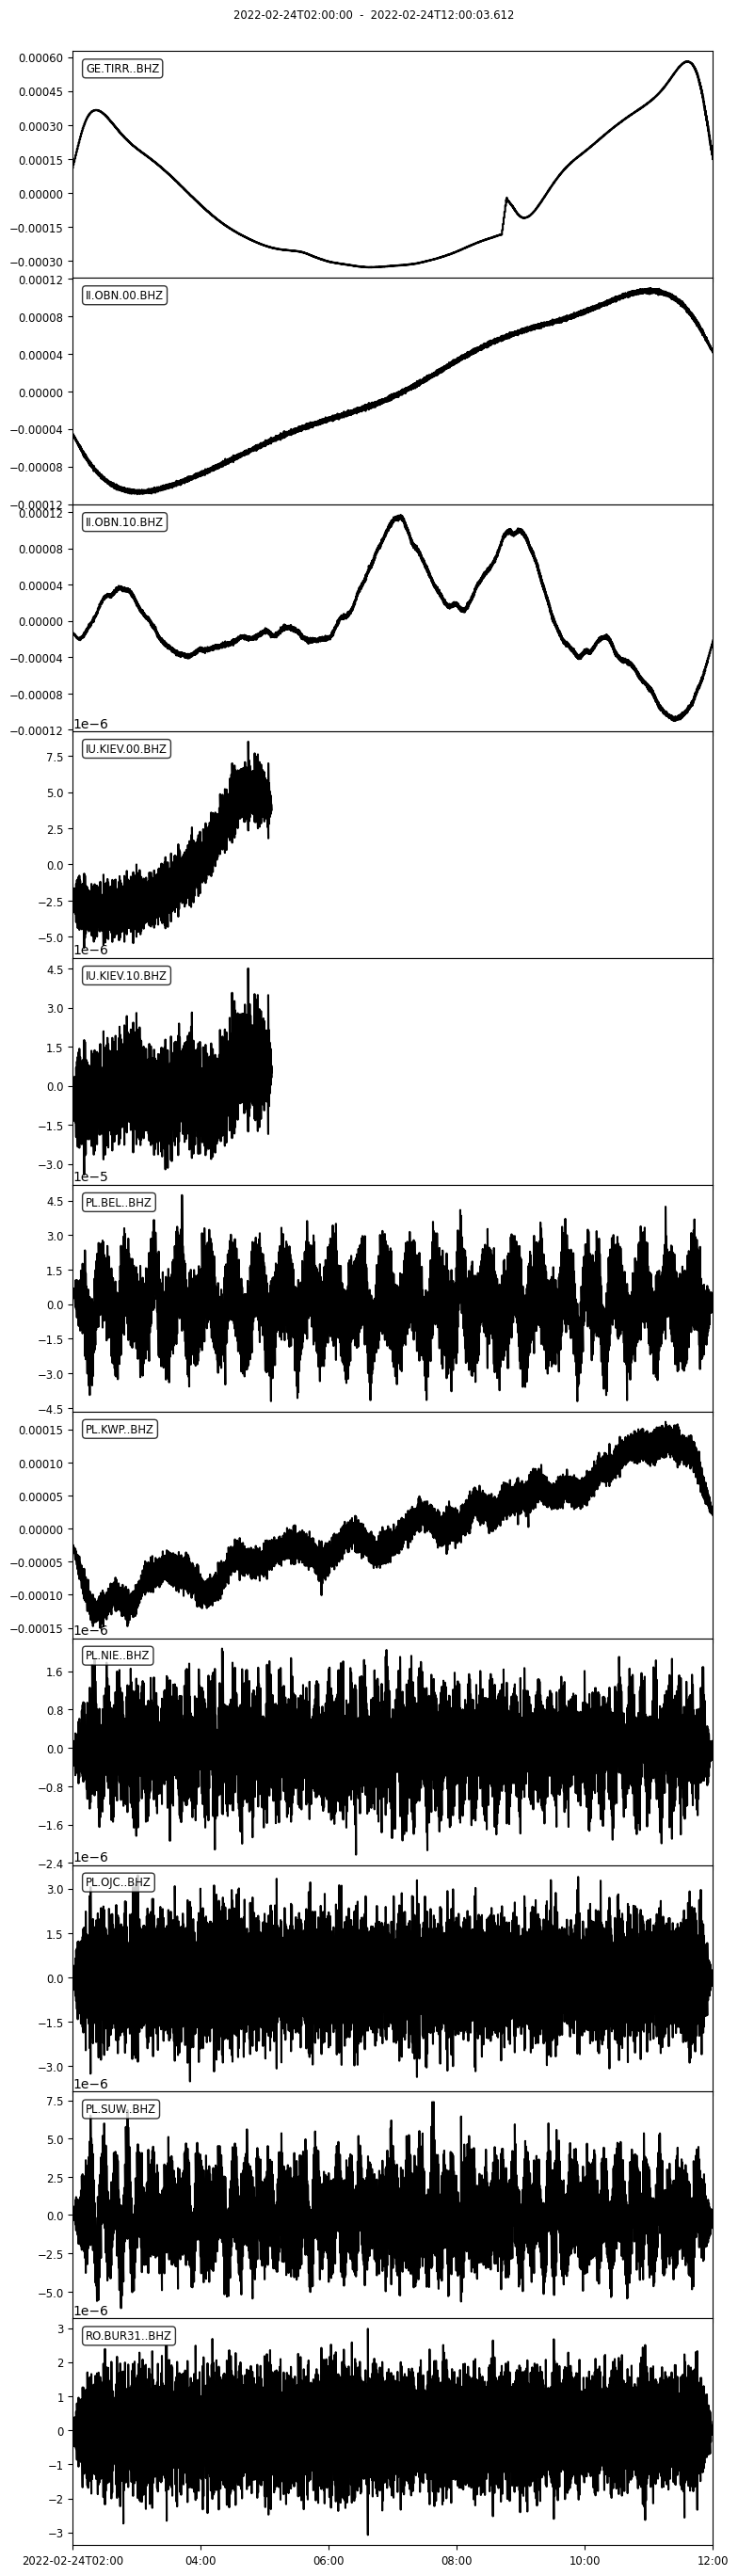

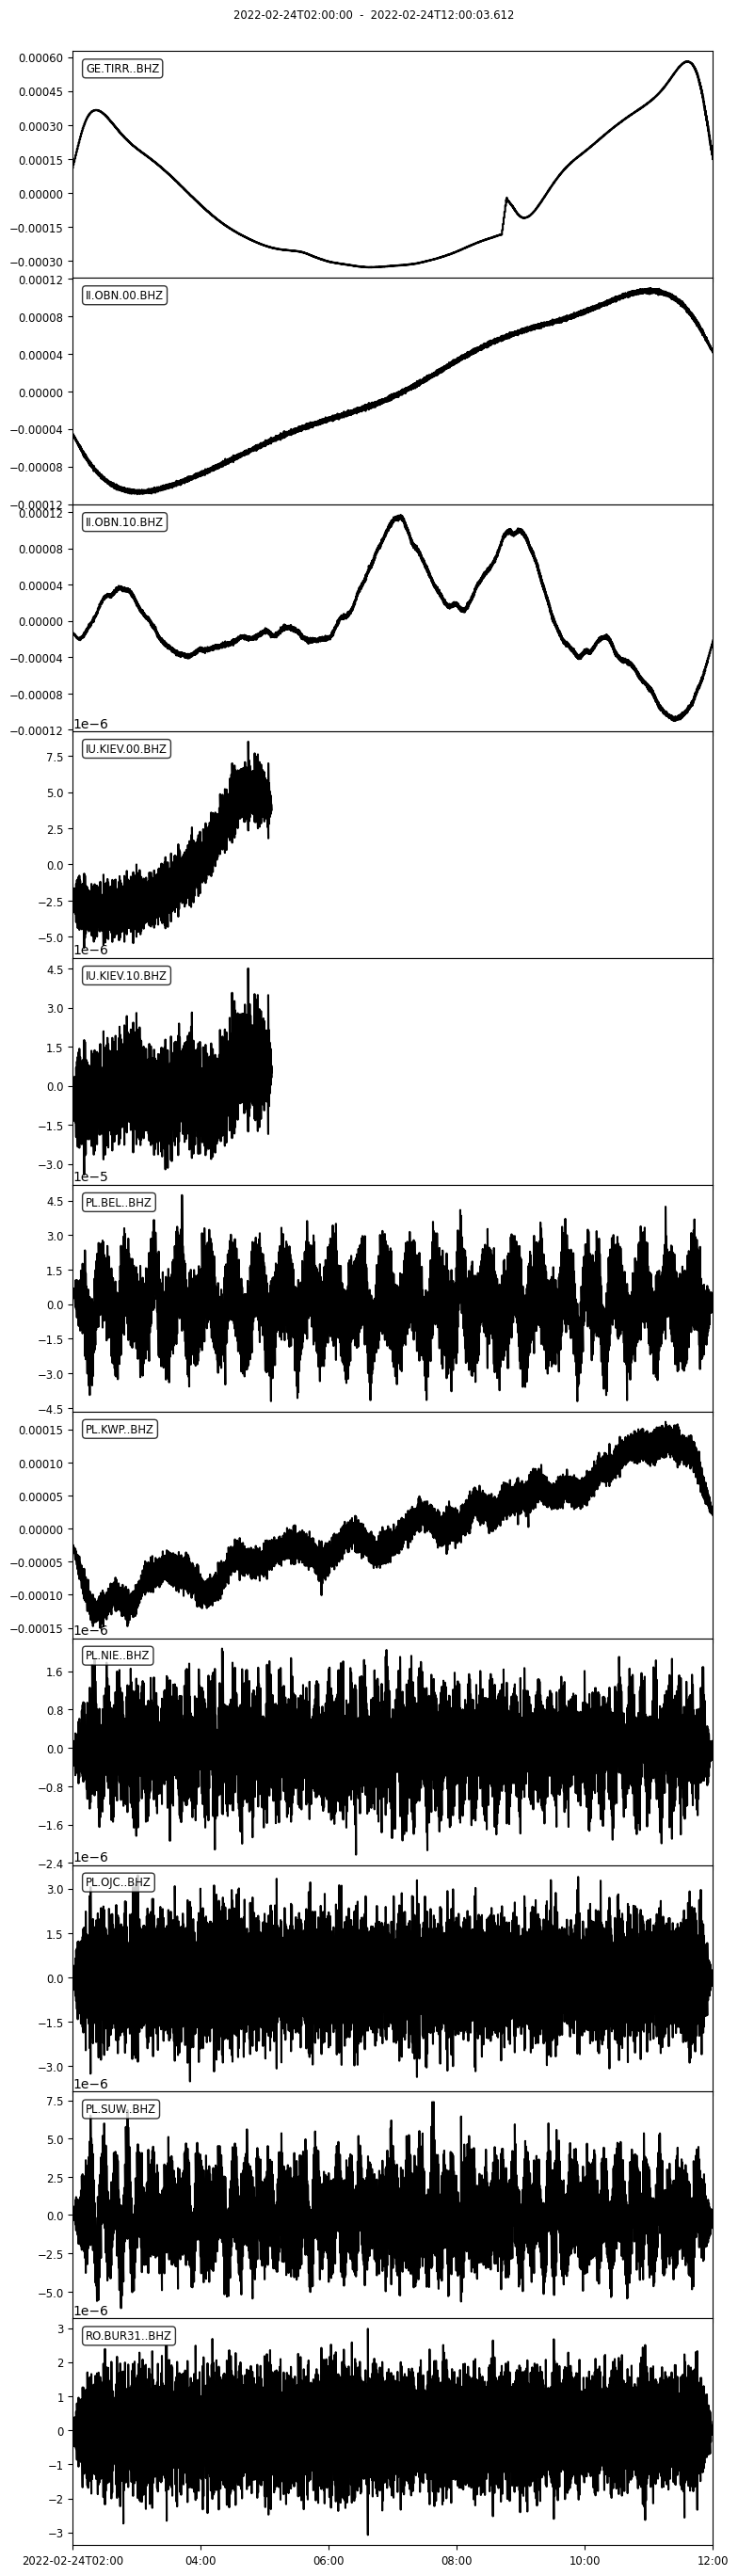

In [137]:
st_select.plot(equal_scale=False)

In [138]:
st_plot = st_select.copy()
st_plot.detrend(type='demean')
st_plot.detrend(type='linear')
st_plot.taper(0.05)
#st_plot.filter('bandpass',freqmin=0.3,freqmax=0.4).plot()
st_plot.filter('highpass',freq=1)

11 Trace(s) in Stream:
GE.TIRR..BHZ   | 2022-02-24T02:00:00.005000Z - 2022-02-24T11:59:59.955000Z | 20.0 Hz, 720000 samples
II.OBN.00.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.969538Z | 20.0 Hz, 720000 samples
II.OBN.10.BHZ  | 2022-02-24T02:00:00.019538Z - 2022-02-24T11:59:59.994538Z | 40.0 Hz, 1440000 samples
IU.KIEV.00.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:06.569538Z | 20.0 Hz, 223332 samples
IU.KIEV.10.BHZ | 2022-02-24T02:00:00.019538Z - 2022-02-24T05:06:12.819538Z | 40.0 Hz, 446913 samples
PL.BEL..BHZ    | 2022-02-24T02:00:00.002600Z - 2022-02-24T11:59:59.952600Z | 20.0 Hz, 720000 samples
PL.KWP..BHZ    | 2022-02-24T02:00:00.037000Z - 2022-02-24T11:59:58.137000Z | 20.0 Hz, 719963 samples
PL.NIE..BHZ    | 2022-02-24T02:00:00.009000Z - 2022-02-24T12:00:03.509000Z | 20.0 Hz, 720071 samples
PL.OJC..BHZ    | 2022-02-24T02:00:00.028000Z - 2022-02-24T12:00:01.778000Z | 20.0 Hz, 720036 samples
PL.SUW..BHZ    | 2022-02-24T02:00:00.012000Z - 2022-02-24T12:00:03.

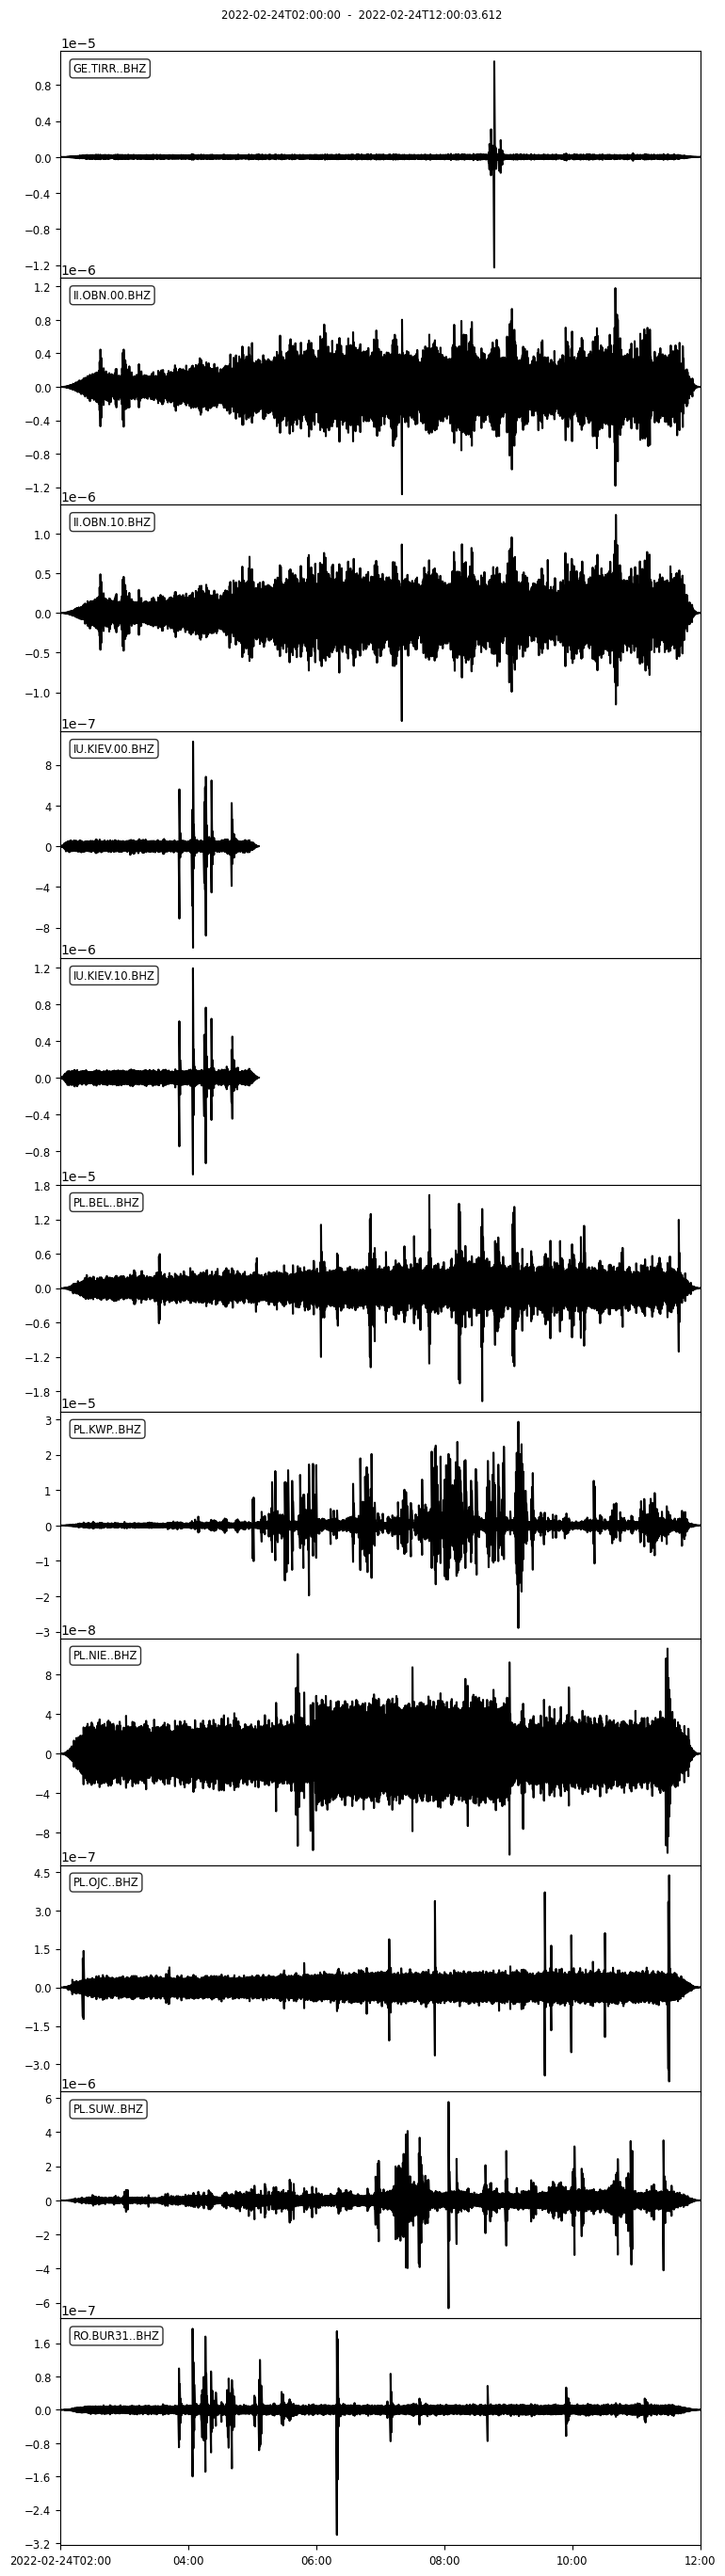

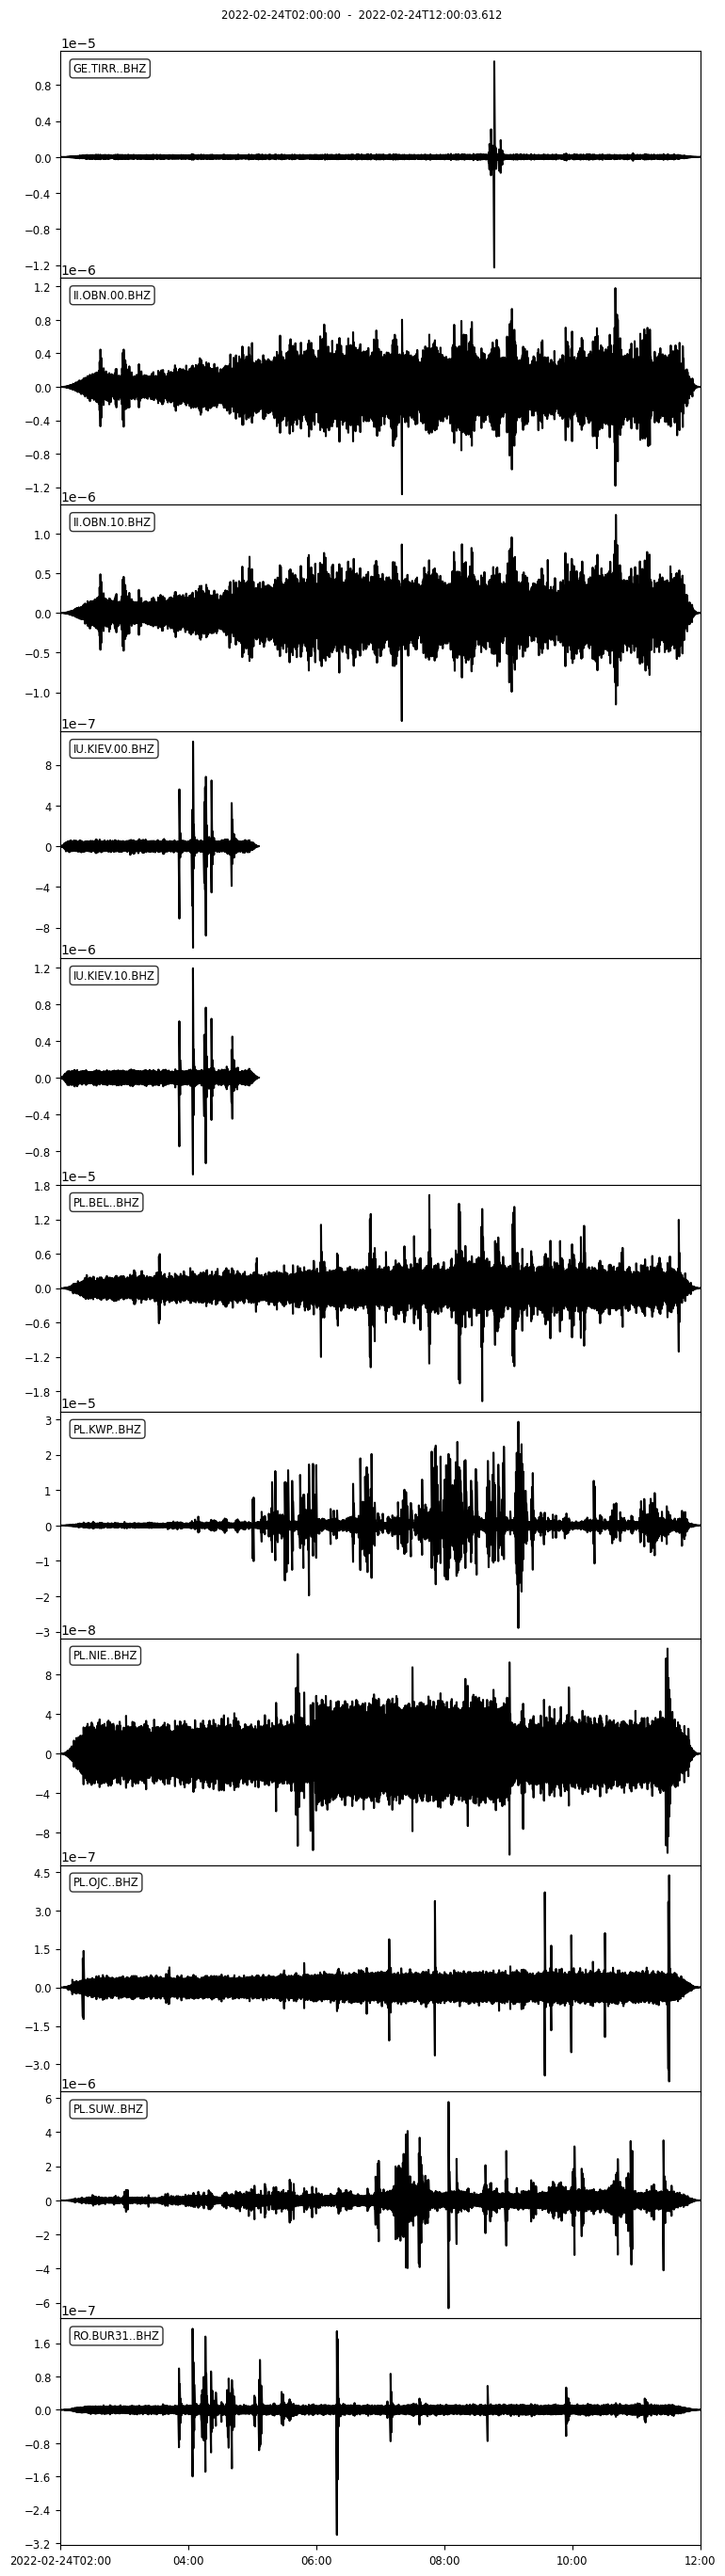

In [139]:
st_plot.plot(equal_scale=False)